In [86]:
pip install shap


   ---------------------------------------- 0.0/455.5 kB ? eta -:--:--
   --------------- ------------------------ 174.1/455.5 kB 3.6 MB/s eta 0:00:01
   ------------------- -------------------- 225.3/455.5 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  450.6/455.5 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 455.5/455.5 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----- ---------------------------------- 0.4/2.7 MB 12.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.7 MB 11.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.7 MB 6.0 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.7 MB 5.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.7 MB 5.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.7 MB 3.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.7 MB 3.9 MB/s eta 0:00:01
   --

In [17]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/294.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('heart_attack_prediction_dataset.xlsx')

In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [5]:
df.shape

(8763, 26)

In [6]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [8]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [9]:
#there is some imbalancing in the data,

In [10]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [5]:
data=df.copy()

In [6]:
data.drop(columns=['Patient ID','Income','Hemisphere','Continent','Country'],inplace=True)

In [13]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,39.997211,800.000000,7.000000,10.000000,1.000000


In [14]:
data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Heart Attack Risk'],
      dtype='object')

In [15]:
df['Previous Heart Problems'].value_counts()

Previous Heart Problems
0    4418
1    4345
Name: count, dtype: int64

In [7]:
import seaborn as sns

In [8]:
categorical_columns=data.select_dtypes(include=['object']).columns

In [9]:
categorical_columns

Index(['Sex', 'Blood Pressure', 'Diet'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [12]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,1,208,158/88,72,0,0,1,0,0,...,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,1,389,165/93,98,1,1,1,1,1,...,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,0,324,174/99,72,1,0,0,0,0,...,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,1,383,163/100,73,1,1,1,0,1,...,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,1,318,91/88,93,1,1,1,1,0,...,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0


In [13]:
data['Diet'] = le.fit_transform(data['Diet'])

In [14]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,1,208,158/88,72,0,0,1,0,0,...,0,0,0,9,6.615001,31.251233,286,0,6,0
1,21,1,389,165/93,98,1,1,1,1,1,...,2,1,0,1,4.963459,27.194973,235,1,7,0
2,21,0,324,174/99,72,1,0,0,0,0,...,1,1,1,9,9.463426,28.176571,587,4,4,0
3,84,1,383,163/100,73,1,1,1,0,1,...,0,1,0,9,7.648981,36.464704,378,3,4,0
4,66,1,318,91/88,93,1,1,1,1,0,...,2,1,0,6,1.514821,21.809144,231,1,5,0


In [29]:
data['Diet'].value_counts()

Diet
1    2960
0    2912
2    2891
Name: count, dtype: int64

In [15]:
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data = data.drop('Blood Pressure', axis=1)

In [16]:
data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,0,9,6.615001,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,0,1,4.963459,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,1,9,9.463426,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,0,9,7.648981,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,0,6,1.514821,21.809144,231,1,5,0,91,88


In [18]:
data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,0,9,6.615001,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,0,1,4.963459,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,1,9,9.463426,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,0,9,7.648981,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,0,6,1.514821,21.809144,231,1,5,0,91,88


<Axes: >

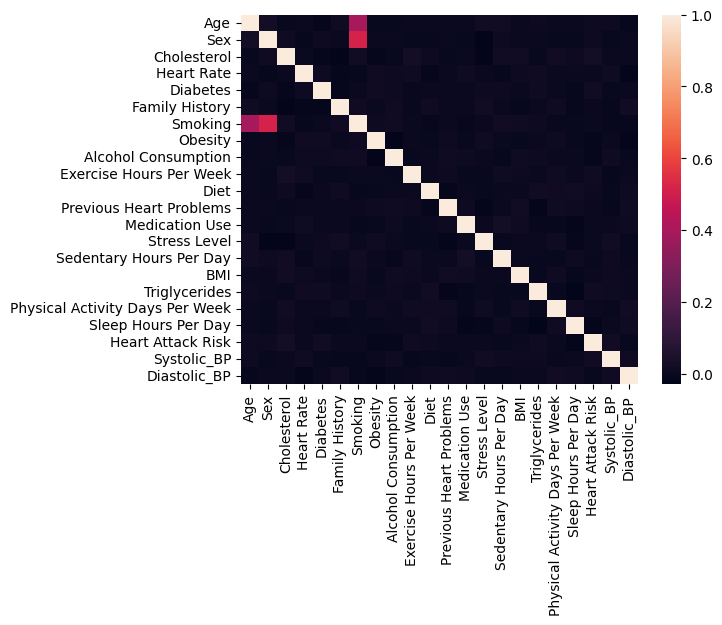

In [19]:
sns.heatmap(data.corr())

In [20]:
X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

In [24]:
k_best = SelectKBest(score_func=f_classif, k=13)  # Select top 13 features

# Fit SelectKBest to the training data
X_train_best = k_best.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X.columns[k_best.get_support(indices=True)].tolist()

X_test_best= k_best.transform(X_test)

In [25]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_best)  # Fit on training data
X_test_scaled = scaler.transform(X_test_best)       # Transform test data

In [26]:
X_train_scaled

array([[ 1.42009072, -0.5344748 ,  0.73345432, ...,  0.57659349,
        -0.51879055, -0.37703014],
       [ 1.60835739, -0.63331388,  0.73345432, ...,  1.04683575,
        -1.52271651, -0.1493701 ],
       [ 1.70249073, -0.4479906 ,  0.73345432, ..., -0.71769236,
        -1.02075353,  1.10276012],
       ...,
       [-1.02737609, -1.12750929,  0.73345432, ...,  1.62008346,
         0.98709838,  0.7992134 ],
       [ 1.46715739,  0.30565739,  0.73345432, ...,  0.61242147,
         1.48906136,  1.14070346],
       [ 1.65542406, -0.25031244,  0.73345432, ...,  0.91248082,
        -0.01682757, -1.28767031]])

In [27]:
X_test_scaled

array([[ 0.525824  ,  0.98517608, -1.36341142, ..., -0.4489825 ,
        -1.52271651, -0.41497348],
       [ 1.09062403,  1.24462866,  0.73345432, ...,  0.24966315,
        -0.51879055,  1.59602355],
       [ 0.76115734,  0.99753096,  0.73345432, ..., -1.39394552,
         0.48513541,  0.7992134 ],
       ...,
       [ 1.70249073, -1.01631532, -1.36341142, ..., -0.02352521,
        -1.02075353, -0.1493701 ],
       [ 0.10222397, -0.79392739,  0.73345432, ..., -1.08492917,
         0.98709838,  1.55808021],
       [-0.93324276,  0.94811142,  0.73345432, ...,  1.3468951 ,
        -1.52271651,  0.49566668]])

In [28]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [29]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

In [30]:
training_results = {}
for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    accuracy = accuracy_score(y_train, y_pred_train)
    training_results[name] = {'Accuracy': accuracy}

In [31]:
training_results_df = pd.DataFrame(training_results)

In [32]:
training_results_df

,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine
Accuracy,0.641797,1.0,1.0,0.64465


In [33]:
testing_results = {}
for name, model in models.items():
    y_pred_test = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_test)
    testing_results[name] = {'Accuracy': accuracy}

In [34]:
testing_results_df = pd.DataFrame(testing_results)

In [35]:
testing_results_df

,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine
Accuracy,0.641757,0.533942,0.631489,0.641187


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
#hyperparamter tuning for LR and SVM
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

param_dist_lr = {
    'C': uniform(0.01, 10),
    'solver': ['lbfgs', 'liblinear']
}

random_search_lr = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=param_dist_lr,
    n_iter=50,  # Number of iterations
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=10,
    random_state=42
)

random_search_lr.fit(X_train_scaled, y_train)

best_lr_model = random_search_lr.best_estimator_
print(f'Best parameters for Logistic Regression: {random_search_lr.best_params_}')
print(f'Best score for Logistic Regression: {random_search_lr.best_score_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Logistic Regression: {'C': 3.7554011884736247, 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.6417974322396576


In [39]:
y_pred_lr = best_lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')


print(f"Logistic Regression - Accuracy: {accuracy_lr}, Precision: {precision_lr}, Recall: {recall_lr}, F1 Score: {f1_lr}")

Logistic Regression - Accuracy: 0.6417569880205363, Precision: 0.41185203167319073, Recall: 0.6417569880205363, F1 Score: 0.5017210642968056


C:\Users\lavya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# Hyperparameter tuning for Decision Tree
param_dist_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
random_search_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                      param_distributions=param_dist_dt, n_iter=50, cv=5, 
                                      scoring='accuracy', n_jobs=-1, verbose=10)
random_search_dt.fit(X_train_scaled, y_train)
best_dt_model = random_search_dt.best_estimator_

# Hyperparameter tuning for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                      param_distributions=param_dist_rf, n_iter=50, cv=5, 
                                      scoring='accuracy', n_jobs=-1, verbose=10)
random_search_rf.fit(X_train_scaled, y_train)
best_rf_model = random_search_rf.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [41]:
y_pred_dt = best_dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Evaluate Random Forest
y_pred_rf = best_rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Decision Tree - Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}")
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")

Decision Tree - Accuracy: 0.6138049058756417, Precision: 0.5288682675886262, Recall: 0.6138049058756417, F1 Score: 0.5272760754802284
Random Forest - Accuracy: 0.6417569880205363, Precision: 0.41185203167319073, Recall: 0.6417569880205363, F1 Score: 0.5017210642968056


C:\Users\lavya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


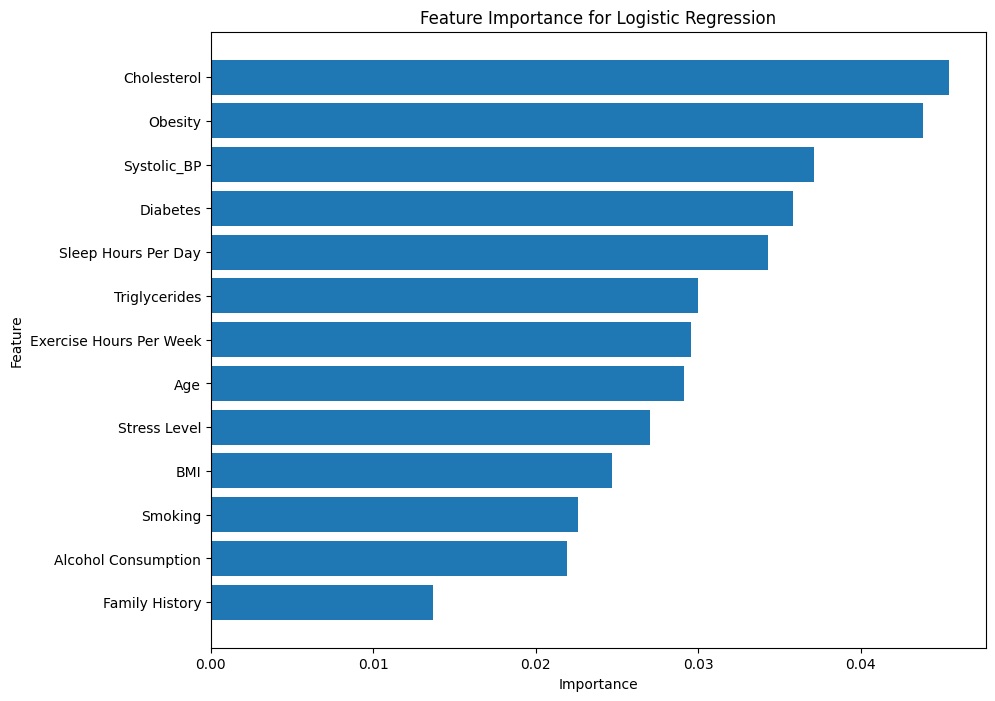

In [42]:
coefficients = best_lr_model.coef_[0]
feature_importance_lr = pd.DataFrame({
    'Feature': selected_features,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

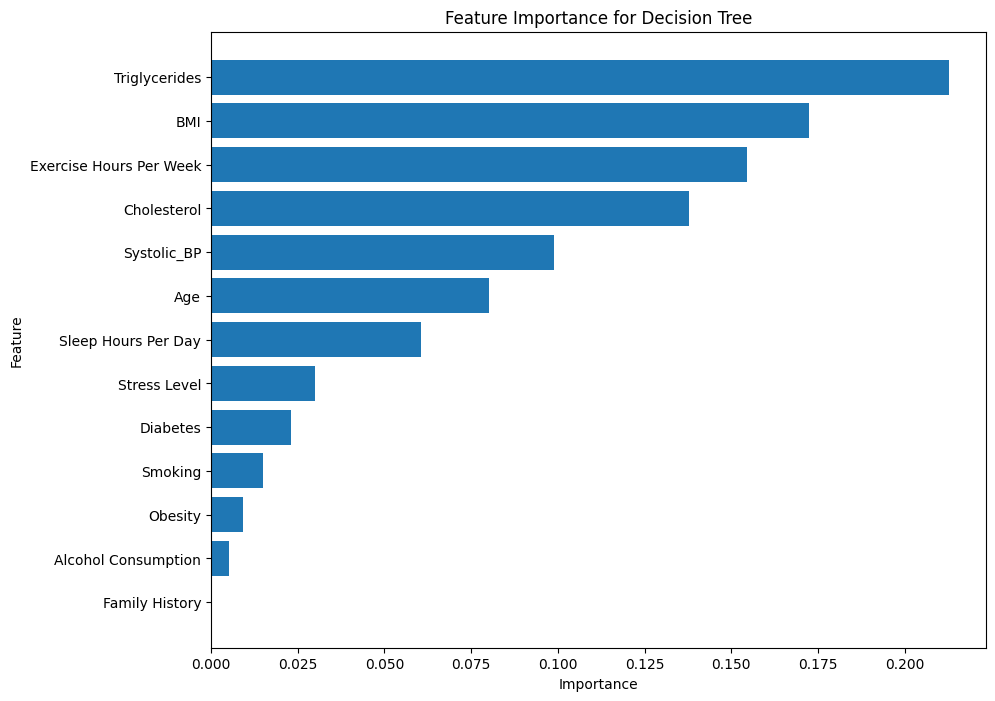

In [43]:
feature_importances_dt = best_dt_model.feature_importances_
feature_importance_dt = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances_dt
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Decision Tree')
plt.gca().invert_yaxis()
plt.show()

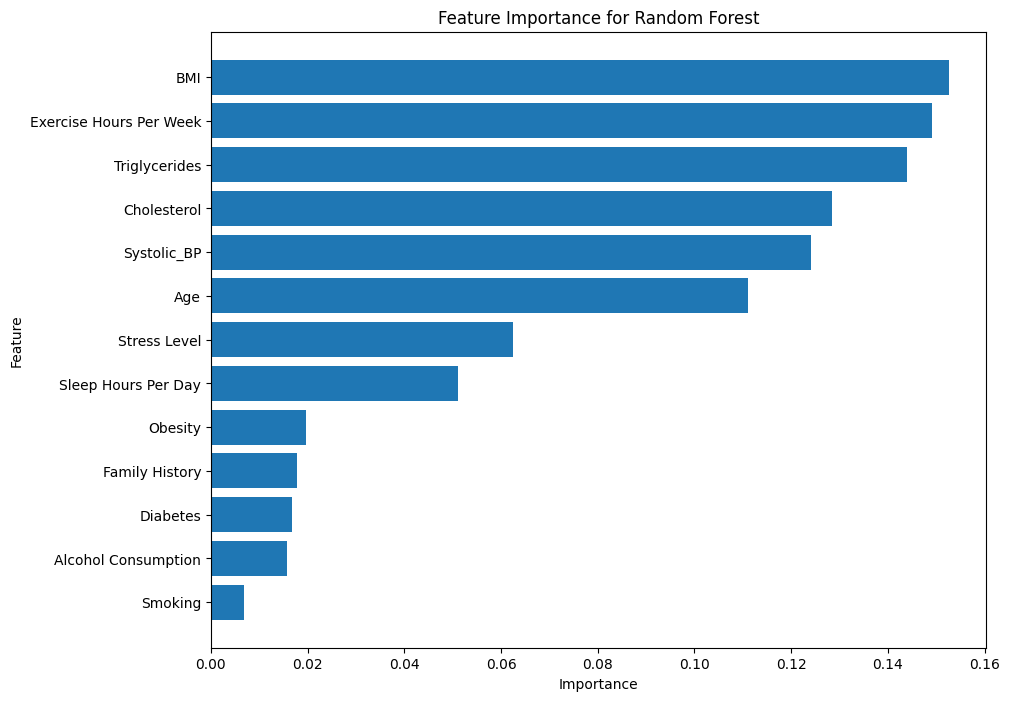

In [44]:
feature_importances_rf = best_rf_model.feature_importances_
feature_importance_rf = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.gca().invert_yaxis()
plt.show()